In [1]:
import moviepy.editor as mp
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.signal
import wave, sys
import audio2numpy as a2n
from audio2numpy import open_audio
from scipy.fft import fft, ifft
from scipy.io import wavfile
from scipy.io.wavfile import read
import scipy.io
from pydub import AudioSegment
import pandas as pd
import os
import ffmpeg

In [83]:
### Define all video paths and file titles

owd = os.getcwd()
raw_video_dir = r'\Users\greenhouselab\Documents\Rubi\typingtask_pilotdata\p04_AK_04042022\task_video\Aerial\Raw' ## change this as needed
save_dir = r'\Users\greenhouselab\Documents\Rubi\typingtask_pilotdata\p04_AK_04042022\task_video\Aerial\Edited' ## change this as needed
whole_video_name = 'p04_04042022_aerial_wholetask.mp4' ## change to match task subject, date, and camera view
audio_name = r"p04_04042022_aerial.wav" ## change to match task subject, date, and camera view

In [84]:
### concatenating all go-pro videos of interest into one
os.chdir(save_dir)
f = open('video_path_file.txt', 'w')
for filename in os.scandir(raw_video_dir):
    if filename.is_file():
        f.write('file \'' + filename.path + '\'')
        f.write('\n')
f.close()

concatenate = 'ffmpeg -f concat -safe 0 -i video_path_file.txt -c copy %s'  % (whole_video_name)
os.system(concatenate)

0

In [85]:
### importing whole task video into moviepy format
video_dir = save_dir + '\\' + whole_video_name
video = mp.VideoFileClip(video_dir)

In [86]:
### extracting audio file from video
audio = video.audio.write_audiofile(audio_name)

MoviePy - Writing audio in p04_04042022_aerial.wav


MoviePy - Done.


In [87]:
### turning stereo audio file to mono
audio = AudioSegment.from_wav(audio_name)
audio = audio.set_channels(1)
audio = audio.export(save_dir + '\\' + audio_name, format="wav")

In [88]:
### making numpy array from audio file
sample_rate, samples = wavfile.read(audio)

In [89]:
sample_rate

44100

In [90]:
samples

array([  0,   0,   0, ..., 633, 647, 655], dtype=int16)

In [91]:
len(samples)

63189125

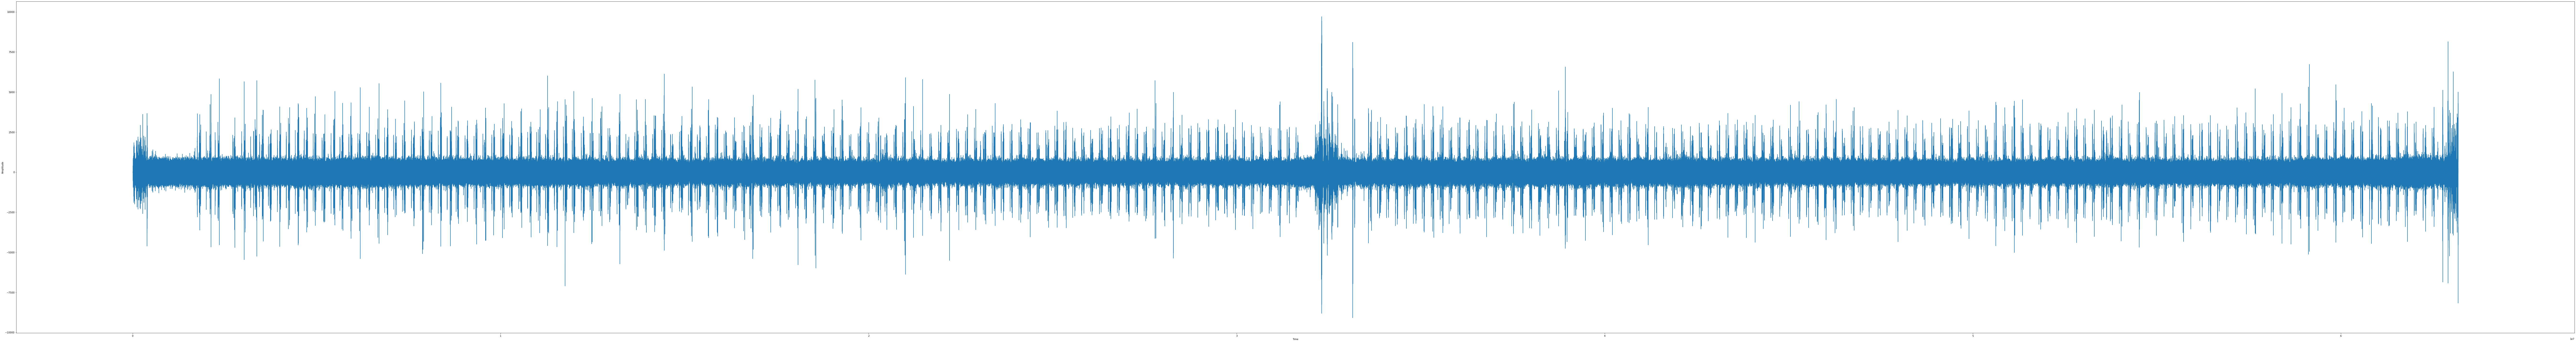

In [92]:
plt.rcParams["figure.figsize"] = [150, 20]
plt.rcParams["figure.autolayout"] = True
input_data = samples
plt.plot(input_data)
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.ylim()
plt.xlim()
plt.show()

In [93]:
# run peak detection to see if there are 120 peaks here

indexes, _ = scipy.signal.find_peaks(samples, height=7, distance=2.1)
print('Peaks are: %s' % (indexes))

Peaks are: [    8642     8679     8716 ... 63189065 63189085 63189104]


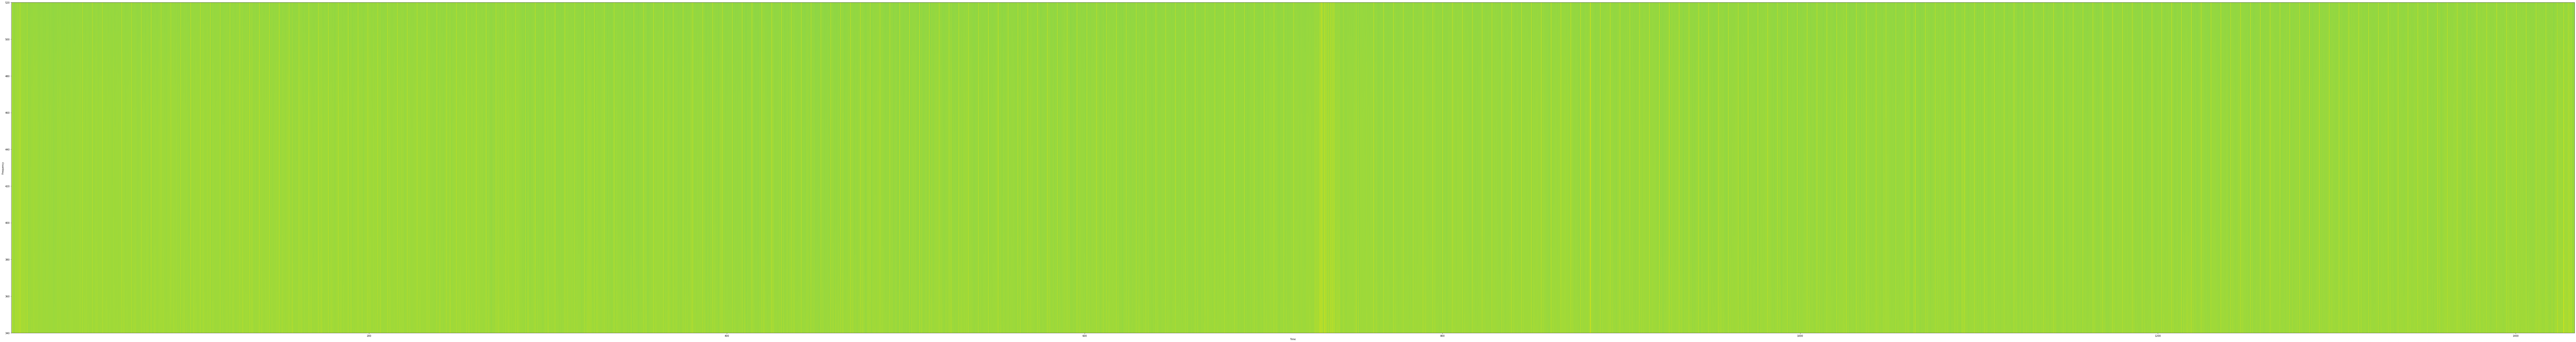

In [94]:
powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(samples, Fs=sample_rate)
plt.rcParams["figure.figsize"] = [12, 6]
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.ylim(340, 520)
plt.show()

In [95]:
## need to go through the row that correponds with 440hz (2 and 3 are closest) in powerspectrum, and time stamps of peaks. 

In [96]:
time[1]

0.005804988662131519

In [97]:
powerSpectrum[3]

array([  0.        ,   0.        ,   0.        , ...,  38.58321071,
       123.95480729, 146.74421661])

In [98]:
# def find_beep(freq):
#     lowA = pd.()
#     for x in freq:
#         lowA.append(x)

In [99]:
# find_beep(powerSpectrum[3])

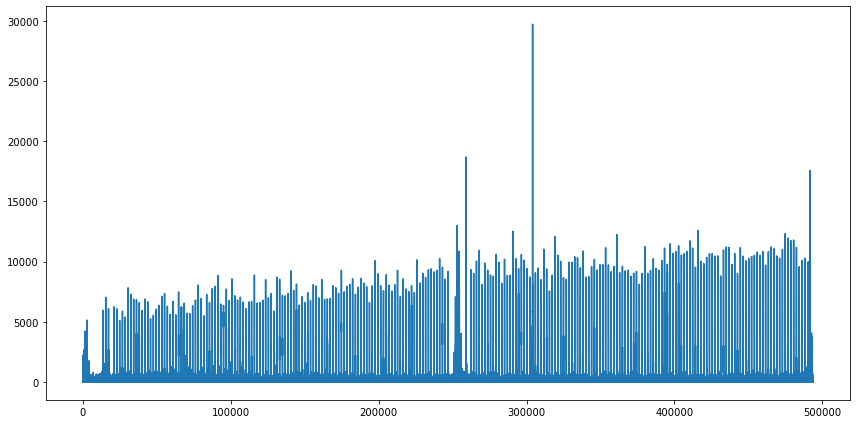

<Figure size 8640x1440 with 0 Axes>

In [100]:
lowA = np.array(powerSpectrum[2])
# plt.rcParams.update({'font.size': 50})
plt.plot(lowA)
plt.figure(figsize=(120, 20))
plt.show()

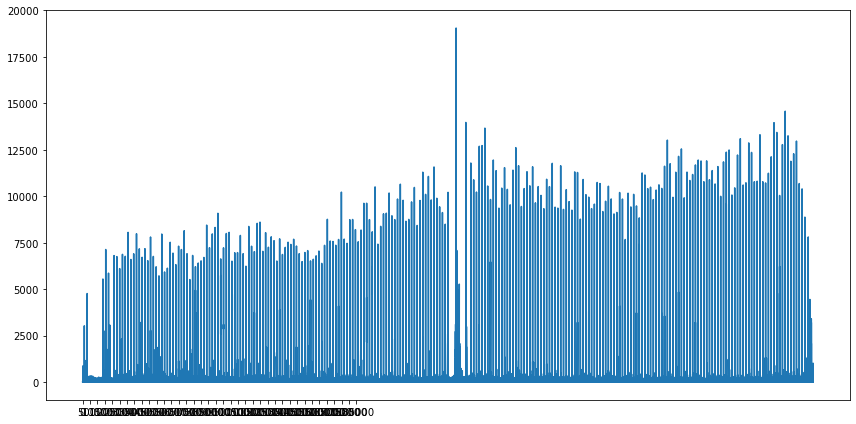

In [101]:
highA = np.array(powerSpectrum[3])
plt.plot(highA)
# plt.figure(figsize=(120, 20))
plt.xlim()
plt.xticks(np.arange(0, 190000, step=5000))
plt.show()

In [102]:
indexes, _ = scipy.signal.find_peaks(highA, height=150000, distance=120)
len(indexes)

0

In [39]:
## get time stamps for each peak from 'time' output of spectrogram
def find_peak_times(): 
    peak_times = np.empty(np.shape(indexes))
    for idx, x in enumerate(indexes):
        stamp = time[x]
        peak_times[idx] = stamp
    return peak_times

In [40]:
cut_times = (find_peak_times()).tolist()
cut_times

[]

In [75]:
# for idx, cut in enumerate(cut_times):
#     clip = video.subclip(cut, cut+3.5)
#     name = 'trial_%s.mp4' % idx
#     clip.write_videofile(name)

In [76]:
for idx, cut in enumerate(cut_times):
    command = 'ffmpeg -t 3.5 -ss %s -i "%s" -y trial_%s.mp4' % (cut, video_path, idx)
    print(command)
    os.system(command)

ffmpeg -t 3.5 -ss 2.766077097505669 -i "\Users\greenhouselab\Documents\Rubi\typingtask_pilotdata\GX010029.MP4" -y trial_0.mp4
ffmpeg -t 3.5 -ss 3.175328798185941 -i "\Users\greenhouselab\Documents\Rubi\typingtask_pilotdata\GX010029.MP4" -y trial_1.mp4
ffmpeg -t 3.5 -ss 8.658140589569161 -i "\Users\greenhouselab\Documents\Rubi\typingtask_pilotdata\GX010029.MP4" -y trial_2.mp4
ffmpeg -t 3.5 -ss 33.66603174603175 -i "\Users\greenhouselab\Documents\Rubi\typingtask_pilotdata\GX010029.MP4" -y trial_3.mp4
ffmpeg -t 3.5 -ss 38.94857142857143 -i "\Users\greenhouselab\Documents\Rubi\typingtask_pilotdata\GX010029.MP4" -y trial_4.mp4
ffmpeg -t 3.5 -ss 44.44589569160998 -i "\Users\greenhouselab\Documents\Rubi\typingtask_pilotdata\GX010029.MP4" -y trial_5.mp4
ffmpeg -t 3.5 -ss 53.27238095238095 -i "\Users\greenhouselab\Documents\Rubi\typingtask_pilotdata\GX010029.MP4" -y trial_6.mp4
ffmpeg -t 3.5 -ss 58.760997732426304 -i "\Users\greenhouselab\Documents\Rubi\typingtask_pilotdata\GX010029.MP4" -y tri

KeyboardInterrupt: 